In [9]:
(*directory="your_directory_where_data_are_saved" *)
(*SetDirectory[Directory[]];*)
directory=SetDirectory[Directory[]];
Needs["ErrorBarPlots`"]
Needs["ErrorBarLogPlots`"] (*this has to be installed separately  *)
SE[x_] := If[Length[x] > 1, Sqrt[Variance[x]/Length[x]], 0]
Clear[SEbin]
SEbin[data_] := 
 Module[{parts = Partition[data, UpTo[Floor[Length[data]/10]]], 
   means}, means = Mean[#] & /@ parts; {Mean[1. data], SE[1. means]}]

### Demonstration of replication synchrony loss 

-Graphics-
-Graphics-
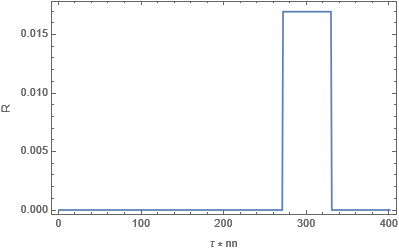
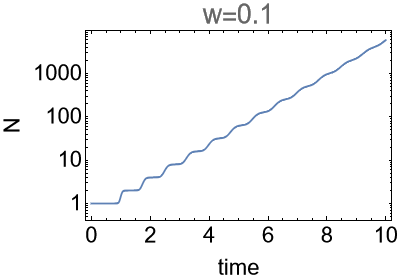

In [17]:
tmax = 10;
nn = 400;
Clear[p, rr, kk, n, norm]
www = 0.1;
rr[i_] := If[Abs[(i/nn) - 0.75] < www 0.75, 1, 0];
norm = Sum[rr[i], {i, 0, nn}];
ListPlot[Table[rr[i]/norm, {i, 0, nn}], PlotRange -> All, 
 Joined -> True, Frame -> True, FrameLabel -> {"\[Tau] * nn", "R"}]
sol = NDSolve[Flatten[{
      Table[
       D[n[i, t], t] == 
        nn (-n[i, t] + If[i < nn, n[i + 1, t], 0]) + 
         2 nn n[0, t] rr[i]/norm, {i, 1, nn}],
      totn[t] == Sum[n[j, t], {j, 0, nn}],
      D[n[0, t], t] == nn (n[1, t] - n[0, t]),
      Table[n[i, 0] == If[i == nn, 1, 0], {i, 0, nn}]}],
    Flatten[{Table[n[i, t], {i, 0, nn}], totn[t]}], {t, 0, tmax}][[1]];
ListLogPlot[
 Table[{t, totn[t] /. sol}, {t, 0, tmax, tmax/1000}], Joined -> True, 
 PlotRange -> All, Frame -> True, FrameLabel -> {"time", "N"}, 
 PlotLabel -> "w=" <> ToString[www], BaseStyle -> FontSize -> 20, 
 FrameStyle -> Black]

### Figure 1

3 f2[t]
{f1'[t] == 1. f1[t] + f1[t] Min[0, -7 + -------], 
                                        100000
 
                                          1                     f2[t]
>   f2'[t] == 1. f2[t] + f2[t] Min[0, -(------) f1[t] + 7 (1 - -------)], 
                                        100000                 1000000
 
>   f1[0] == 200000., f2[0] == 200000.}
{f1[t] -> InterpolatingFunction[{{0., 12.}}, <>][t], 
 
>   f2[t] -> InterpolatingFunction[{{0., 12.}}, <>][t]}
-Graphics-
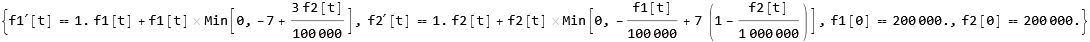
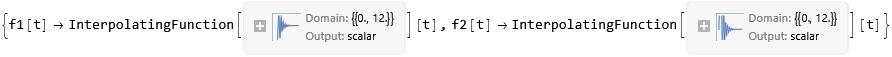
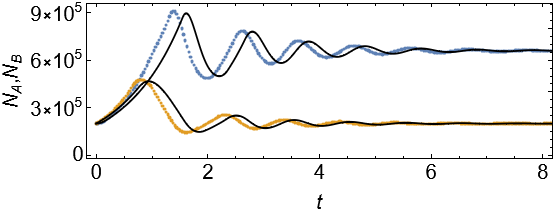

In [57]:
tmp = Import["data_30_7_7_10_b=1_k=1000000_nA02_nB02.dat", "Table"];
tmax = 12;
{f1'[t] == b f1[t] + f1[t] Min[p1 f2[t]/k - p2 , 0], 
  f2'[t] == b f2[t] + f2[t] Min[p3 (1 - f2[t]/k) - p4 (f1[t]/k), 0], 
  f1[0] == 0.2 k, f2[0] == 0.2 k} /. {p1 -> 30, p2 -> 7, p3 -> 7, 
  p4 -> 10, b -> 1., k -> 1000000}
sol = NDSolve[%, {f1[t], f2[t]}, {t, 0, tmax}][[1]]
plt={f1[t], f2[t]} /. sol;
Show[ListPlot[{tmp[[All, {1, 2}]], tmp[[All, {1, 3}]]}, 
  PlotRange -> All], 
 Plot[plt, {t, 0, tmax}, PlotRange -> All, PlotStyle -> Black], 
 PlotRange -> {{0, 8}, All}, AspectRatio -> 1/3, ImageSize -> 500, 
 Frame -> True, FrameStyle -> Black, BaseStyle -> FontSize -> 18, 
 FrameTicks -> {{{{0, "0"}, {300000, 
      "3\[Cross]\!\(\*SuperscriptBox[\(10\), \(5\)]\)"}, {600000, 
      "6\[Cross]\!\(\*SuperscriptBox[\(10\), \(5\)]\)"}, {900000, 
      "9\[Cross]\!\(\*SuperscriptBox[\(10\), \(5\)]\)"}}, 
    Automatic}, {Automatic, Automatic}}, FrameLabel -> {"\!\(\*
StyleBox[\"t\",\nFontSlant->\"Italic\"]\)", "\!\(\*
StyleBox[SubscriptBox[\"N\", \"A\"],\nFontSlant->\"Italic\"]\),\!\(\*
StyleBox[SubscriptBox[\"N\", \"B\"],\nFontSlant->\"Italic\"]\)"}]

In [63]:
Export[directory <> "/fig1b.pdf", %, "PDF"];

{1.2207, 797423, 293636}
                                        3 f2[t]
{f1'[t] == 1. f1[t] + f1[t] Min[0, -7 + -------], 
                                        100000
 
                                          1                     f2[t]
>   f2'[t] == 1. f2[t] + f2[t] Min[0, -(------) f1[t] + 7 (1 - -------)], 
                                        100000                 1000000
 
>   f1[1.2207] == 797423, f2[1.2207] == 293636}
{f1[t] -> InterpolatingFunction[{{1.2207, 12.}}, <>][t], 
 
>   f2[t] -> InterpolatingFunction[{{1.2207, 12.}}, <>][t]}
-Graphics-
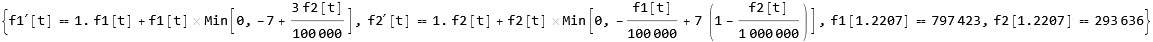
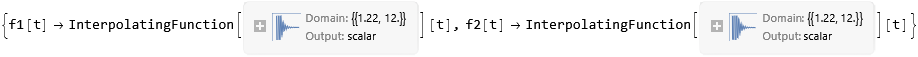
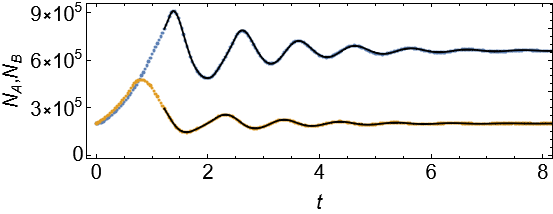

In [64]:
tmax = 12;
nn = 40;
tmp[[nn]]
{f1'[t] == b f1[t] + f1[t] Min[p1 f2[t]/k - p2 , 0], 
  f2'[t] == b f2[t] + f2[t] Min[p3 (1 - f2[t]/k) - p4 (f1[t]/k), 0], 
  f1[tmp[[nn, 1]]] == tmp[[nn, 2]], 
  f2[tmp[[nn, 1]]] == tmp[[nn, 3]]} /. {p1 -> 30, p2 -> 7, p3 -> 7, 
  p4 -> 10, b -> 1., k -> 1000000}
sol = NDSolve[%, {f1[t], f2[t]}, {t, tmp[[nn, 1]], tmax}][[1]]
plt={f1[t], f2[t]} /. sol;
Show[ListPlot[{tmp[[All, {1, 2}]], tmp[[All, {1, 3}]]}, 
  PlotRange -> All], 
 Plot[plt, {t, tmp[[nn, 1]], tmax}, PlotRange -> All, 
  PlotStyle -> Black], PlotRange -> {{0, 8}, All}, AspectRatio -> 1/3,
  ImageSize -> 500, Frame -> True, FrameStyle -> Black, 
 BaseStyle -> FontSize -> 18, 
 FrameTicks -> {{{{0, "0"}, {300000, 
      "3\[Cross]\!\(\*SuperscriptBox[\(10\), \(5\)]\)"}, {600000, 
      "6\[Cross]\!\(\*SuperscriptBox[\(10\), \(5\)]\)"}, {900000, 
      "9\[Cross]\!\(\*SuperscriptBox[\(10\), \(5\)]\)"}}, 
    Automatic}, {Automatic, Automatic}}, FrameLabel -> {"\!\(\*
StyleBox[\"t\",\nFontSlant->\"Italic\"]\)", "\!\(\*
StyleBox[SubscriptBox[\"N\", \"A\"],\nFontSlant->\"Italic\"]\),\!\(\*
StyleBox[SubscriptBox[\"N\", \"B\"],\nFontSlant->\"Italic\"]\)"}]

In [71]:
Export[directory <> "\\fig1c.pdf", %, "PDF"];

### Figure 2

In [72]:
asynchr = 
  Import["S05_K_300000_1of_dev_002_tmax_10000/S05_K_300000_1of_dev_005_tmax_10000_b_0.700000_e.dat"];
Length[asynchr]

32001

-Graphics-
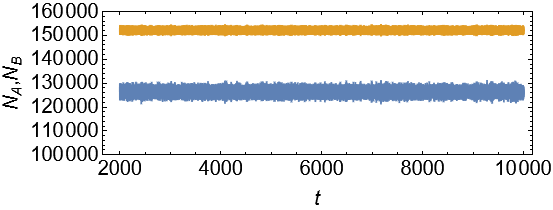

In [74]:
ListPlot[{asynchr[[All, {1, 2}]], asynchr[[All, {1, 3}]]}, 
 Frame -> True, 
 FrameLabel -> {"\!\(\*
StyleBox[\"t\",\nFontSlant->\"Italic\"]\)", "\!\(\*
StyleBox[SubscriptBox[\"N\", \"A\"],\nFontSlant->\"Italic\"]\),\!\(\*
StyleBox[SubscriptBox[\"N\", \"B\"],\nFontSlant->\"Italic\"]\)"}, Joined -> True, PlotRange -> {100000, 160000}, 
 FrameStyle -> Black, BaseStyle -> FontSize -> 18, AspectRatio -> 1/3,
  ImageSize -> 500]

In [75]:
Export[directory <> "/fig2a.pdf", %, "PDF"];

In [82]:
synchr = Import["S05_K_300000_1of_dev_002_tmax_10000/S05_K_300000_1of_dev_005_tmax_10000_b_0.700000_s.dat"];
Length[synchr]

32001

-Graphics-
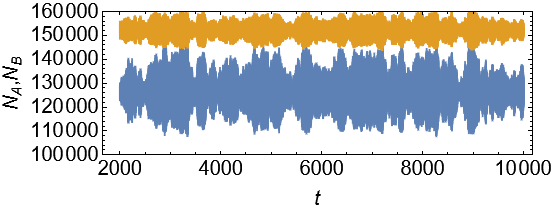

In [85]:
ListPlot[{synchr[[All, {1, 2}]], synchr[[All, {1, 3}]]}, 
 Frame -> True, 
 FrameLabel -> {"\!\(\*
StyleBox[\"t\",\nFontSlant->\"Italic\"]\)", "\!\(\*
StyleBox[SubscriptBox[\"N\", \"A\"],\nFontSlant->\"Italic\"]\),\!\(\*
StyleBox[SubscriptBox[\"N\", \"B\"],\nFontSlant->\"Italic\"]\)"}, Joined -> True, PlotRange -> {100000, 160000}, 
 FrameStyle -> Black, BaseStyle -> FontSize -> 18, AspectRatio -> 1/3,
  ImageSize -> 500]

In [86]:
Export[directory <> "/fig2b.pdf", %, "PDF"];

### Figure 3

-Graphics-
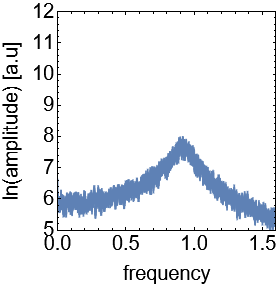

In [87]:
ListPlot[MovingAverage[Log[Abs[Fourier[asynchr[[All, 2]]]]], 20], 
 PlotRange -> {{0, 1.6}, {5, 12}}, Joined -> True, 
 DataRange -> {0, 
   Length[asynchr]/(asynchr[[-1, 1]] - asynchr[[1, 1]])}, 
 Frame -> True, FrameLabel -> {"frequency", "ln(amplitude) [a.u]"}, 
 FrameStyle -> Black, BaseStyle -> FontSize -> 18, AspectRatio -> 1, 
 ImageSize -> 250]

In [88]:
Export[directory <> "/fig3a.pdf", %, "PDF"];

-Graphics-
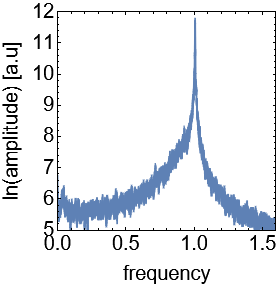

In [89]:
ListPlot[MovingAverage[Log[Abs[Fourier[synchr[[All, 2]]]]], 20], 
 PlotRange -> {{0, 1.6}, {5, 12}}, Joined -> True, 
 DataRange -> {0, Length[synchr]/(synchr[[-1, 1]] - synchr[[1, 1]])}, 
 Frame -> True, FrameLabel -> {"frequency", "ln(amplitude) [a.u]"}, 
 FrameStyle -> Black, BaseStyle -> FontSize -> 18, AspectRatio -> 1, 
 ImageSize -> 250]

In [90]:
Export[directory <> "/fig3b.pdf", %, "PDF"];

### Figure 4

In [91]:
name = "S05_K_100000_1of_dev_002_tmax_10000";
namese = FileNames[name <> "/*_e.dat"];
namess = FileNames[name <> "/*_s.dat"];

In [94]:
Clear[Maxamp]
Maxamp[d_] := Max[d - Mean[d]]/Mean[d];
tmp = Table[
   Module[{de = ReadList[namese[[i]], {Number, Number, Number}], 
     ds = ReadList[
       namess[[i]], {Number, Number, Number}]}, {ToExpression[
      StringCases[namese[[i]], "b_" ~~ b__ ~~ "_" -> b][[1]]], 
     StandardDeviation[1. de[[All, 2]]]/Mean[1. de[[All, 2]]], 
     StandardDeviation[1. de[[All, 3]]]/Mean[1. de[[All, 3]]], 
     StandardDeviation[1. ds[[All, 2]]]/Mean[1. ds[[All, 2]]], 
     StandardDeviation[1. ds[[All, 3]]]/Mean[1. ds[[All, 3]]], 
     Mean[1. de[[All, 2]]], Mean[1. de[[All, 3]]], 
     Mean[1. ds[[All, 2]]], Mean[1. ds[[All, 3]]], 
     Maxamp[1. de[[All, 2]]], Maxamp[1. de[[All, 3]]], 
     Maxamp[1. ds[[All, 2]]], Maxamp[1. ds[[All, 3]]]}]
   , {i, Length[namese]}];


-Graphics-
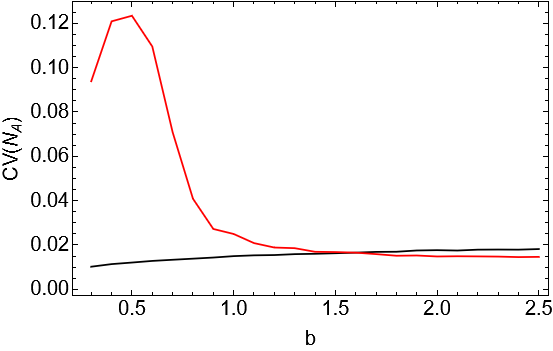

In [97]:
ListPlot[{tmp[[All, {1, 2}]], tmp[[All, {1, 4}]]}, PlotRange -> All, 
 Joined -> True, Frame -> True, FrameStyle -> Black, 
 FrameLabel -> {"b", "CV(\!\(\*SubscriptBox[\(N\), \(A\)]\))"}, 
 ImageSize -> 500, BaseStyle -> FontSize -> 18, 
 PlotStyle -> {Black, Red}]

In [98]:
Export[directory<> "/fig4a.pdf", %, "PDF"];

In [99]:
Clear[ResPeak, tmp]
ResPeak[name_] := 
  Module[{namess = FileNames[name <> "/*_s.dat"], ds, tmp, parts, 
    means},
   tmp = Table[
     ds = 1. ReadList[namess[[i]], {Number, Number, Number}][[All, 
        2]];(* only NA taken *)
     parts = Select[Partition[ds, UpTo[Floor[Length[ds]/11]]],(Length[#]>1)&];(* BW edited here*)
     means = (StandardDeviation[#]/Mean[#]) & /@ parts; {ToExpression[
       StringCases[namess[[i]], "b_" ~~ b__ ~~ "_" -> b][[1]]], 
      StandardDeviation[ds]/Mean[ds], SE[means]}
     , {i, Length[namess]}];
   {{#[[1]], #[[2]]}, ErrorBar[#[[3]]]} & /@ tmp
   ];

In [101]:
specs = {ResPeak["S05_K_10000_1of_dev_002_tmax_50000"], 
   ResPeak["S05_K_30000_1of_dev_002_tmax_50000"], 
   ResPeak["S05_K_100000_1of_dev_002_tmax_50000"], 
   ResPeak["S05_K_300000_1of_dev_002_tmax_10000"], 
   ResPeak["S05_K_1000000_1of_dev_002_tmax_10000"]};
Length[#] & /@ specs

{25, 25, 23, 23, 25}

-Graphics-
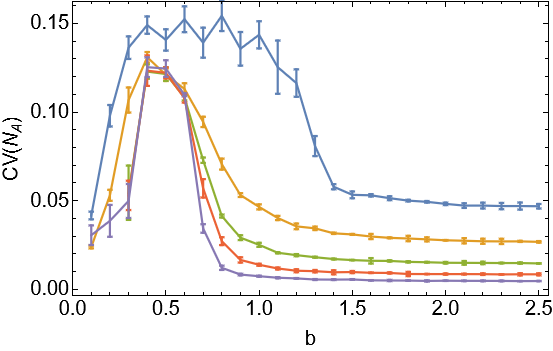

In [103]:
ErrorListPlot[specs, Joined -> True, PlotRange -> All, Frame -> True, 
 FrameStyle -> Black, 
 FrameLabel -> {"b", "CV(\!\(\*SubscriptBox[\(N\), \(A\)]\))"}, 
 ImageSize -> 500, BaseStyle -> FontSize -> 18, PlotStyle -> Thick]

In [104]:
Export[directory<> "/fig4b.pdf", %, "PDF"];

In [105]:
specs2 = {ResPeak["S05_K_100000_1of_dev_002_tmax_50000"], 
   ResPeak["S05_K_100000_1of_dev_004_tmax_10000"], 
   ResPeak["S05_K_100000_1of_dev_008_tmax_10000"], 
   ResPeak["S05_K_100000_1of_dev_01_tmax_10000"], 
   ResPeak["S05_K_100000_1of_dev_02_tmax_10000"]};
Length[#] & /@ specs2

{23, 25, 25, 25, 25}

-Graphics-
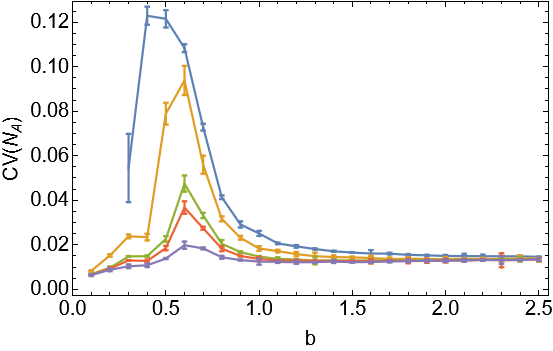

In [107]:
ErrorListPlot[specs2, Joined -> True, PlotRange -> All, Frame -> True,
  FrameStyle -> Black, 
 FrameLabel -> {"b", "CV(\!\(\*SubscriptBox[\(N\), \(A\)]\))"}, 
 ImageSize -> 500, BaseStyle -> FontSize -> 18, PlotStyle -> Thick]

In [108]:
Export[directory<> "/fig4c.pdf", %, "PDF"];

### Figure 5

-Graphics-
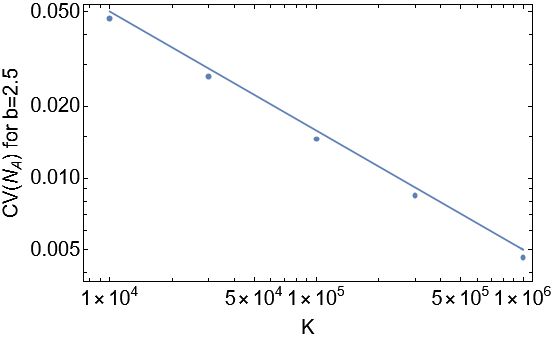

In [109]:
Show[ListLogLogPlot[{{10000, specs[[1, -1, 1, 2]]}, {30000, 
    specs[[2, -1, 1, 2]]}, {100000, specs[[3, -1, 1, 2]]}, {300000, 
    specs[[4, -1, 1, 2]]}, {1000000, specs[[5, -1, 1, 2]]}}], 
 LogLogPlot[5/x^0.5, {x, 10000, 1000000}], Frame -> True, 
 FrameStyle -> Black, 
 FrameLabel -> {"K", 
   "CV(\!\(\*SubscriptBox[\(N\), \(A\)]\)) for b=2.5"}, 
 ImageSize -> 500, BaseStyle -> FontSize -> 18]

In [110]:
Export[directory<> "/fig5.pdf", %, "PDF"];

### Figure 6

In [111]:
tmp = Join[
   Import[directory <> "/P_extinction/runs_quasi/runs_details.dat", "Table"], 
   Import[directory <> "/P_extinction/runs_exponential/runs_details.dat", "Table"][[2 ;;]]];

Legended[-Graphics-, Placed[PointLegend[{Directive[PointSize[0.0128333], 
 
>       RGBColor[0.368417, 0.506779, 0.709798], AbsoluteThickness[1.6]], 
 
>      Directive[PointSize[0.0128333], RGBColor[0.880722, 0.611041, 0.142051], 
 
>       AbsoluteThickness[1.6]], Directive[PointSize[0.0128333], 
 
>       RGBColor[0.560181, 0.691569, 0.194885], AbsoluteThickness[1.6]], 
 
>      Directive[PointSize[0.0128333], RGBColor[0.922526, 0.385626, 0.209179], 
 
>       AbsoluteThickness[1.6]]}, {Poisson, w=0.04, w=0.02, w=0.01}, 
 
>     LegendMarkers -> 
 
>      {{False, Automatic}, {False, Automatic}, {False, Automatic}, {False, Automatic}}, 
 
>     Joined -> {False, False, False, False}, LabelStyle -> Directive[FontSize -> 14], 
 
>     LegendLayout -> Column], {0.75, 0.7}, Identity]]
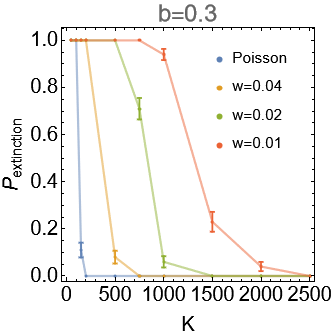

In [112]:
wws = {1, 0.04, 0.02, 0.01};
pext = Table[
   Sort[({{Mean[#[[All, 6]]], p}, 
         ErrorBar[Sqrt[p (1 - p)/Length[#]]]} /. 
        p -> 1. Mean[#[[All, 1]]]) & /@ 
     Gather[Select[
       tmp, (#[[7]] == ww && #[[5]] == 0.3 && #[[6]] < 3000) &], (#1[[
          6]] == #2[[6]]) &]], {ww, wws}];
Show[ListPlot[pext[[All, All, 1]], Joined -> True, 
  PlotStyle -> {{Opacity[0.5], Thick}}], 
 ErrorListPlot[pext, PlotRange -> All, 
  LabelStyle -> Directive[FontSize -> 14], 
  PlotLegends -> 
   Placed[{"Poisson", "w=0.04", "w=0.02", "w=0.01"}, {0.75, 0.7}]], 
 Frame -> True, FrameStyle -> Black, 
 FrameLabel -> {"K", "\!\(\*SubscriptBox[\(P\), \(extinction\)]\)"}, 
 ImageSize -> 300, BaseStyle -> FontSize -> 18, AspectRatio -> 1, 
 PlotLabel -> "b=0.3"]
Export[directory<> "/fig6a.pdf", %, "PDF"];

-Graphics-
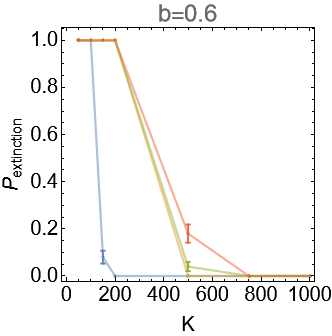

In [116]:
wws = {1, 0.04, 0.02, 0.01};
pext = Table[
   Sort[({{Mean[#[[All, 6]]], p}, 
         ErrorBar[Sqrt[p (1 - p)/Length[#]]]} /. 
        p -> 1. Mean[#[[All, 1]]]) & /@ 
     Gather[Select[
       tmp, (#[[7]] == ww && #[[5]] == 0.6 && #[[6]] < 1200) &], (#1[[
          6]] == #2[[6]]) &]], {ww, wws}];
Show[ListPlot[pext[[All, All, 1]], Joined -> True, 
  PlotStyle -> {{Opacity[0.5], Thick}}], 
 ErrorListPlot[pext, PlotRange -> All(*,PlotLegends->{("w="<>
  ToString[#])&/@wws}*)], Frame -> True, FrameStyle -> Black, 
 FrameLabel -> {"K", "\!\(\*SubscriptBox[\(P\), \(extinction\)]\)"}, 
 ImageSize -> 300, BaseStyle -> FontSize -> 18, AspectRatio -> 1, 
 PlotLabel -> "b=0.6"]
Export[directory <> "/fig6b.pdf", %, "PDF"];

In [120]:
tmpsurv = Select[tmp, (#[[1]] == 0) &];
tmpext = Select[tmp, (#[[1]] == 1) &];

-Graphics-
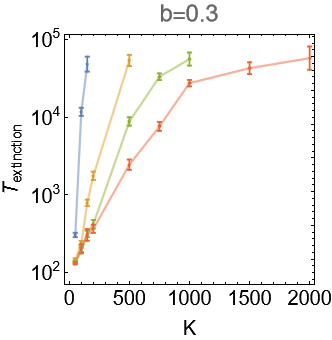

In [243]:
wws = {1, 0.04, 0.02, 0.01};
bbb = 0.3;
Textinct = 
  Table[ttt = 
    Sort[({{Mean[#[[All, 6]]], Mean[#[[All, 4]]]}, 
         ErrorBar[SE[#[[All, 4]]]]}) & /@ 
      Gather[Select[
        tmpext, (#[[7]] == ww && #[[5]] == bbb) &], (#1[[6]] == #2[[
           6]]) &]]; 
   If[Length[ttt] > 0, ttt, {{{0, 10^5}, ErrorBar[0]}}], {ww, wws}];
Show[ListLogPlot[Textinct[[All, All, 1]], Joined -> True, 
  PlotStyle -> {{Opacity[0.5], Thick}}], 
 ErrorListLogPlot[Textinct, PlotRange -> All, 
  LabelStyle -> Directive[FontSize -> 14](*,PlotLegends->
  Placed[{("w="<>ToString[#])&/@wws},{Center,Right}]*)], 
 Frame -> True, FrameStyle -> Black, 
 FrameLabel -> {"K", "\!\(\*SubscriptBox[\(T\), \(extinction\)]\)"}, 
 ImageSize -> 300, BaseStyle -> FontSize -> 18, 
 PlotLabel -> ("b=" <> ToString[bbb]), PlotRange -> All, 
 AspectRatio -> 1, 
 FrameTicks -> {{{{Log[100], 
      "\!\(\*SuperscriptBox[\(10\), \(2\)]\)"}, {Log[1000], 
      "\!\(\*SuperscriptBox[\(10\), \(3\)]\)"}, {Log[10000], 
      "\!\(\*SuperscriptBox[\(10\), \(4\)]\)"}, {Log[100000], 
      "\!\(\*SuperscriptBox[\(10\), \(5\)]\)"}}, 
    Automatic}, {Automatic, Automatic}}]
Export[directory <> "/fig6c.pdf", %, "PDF"];

-Graphics-
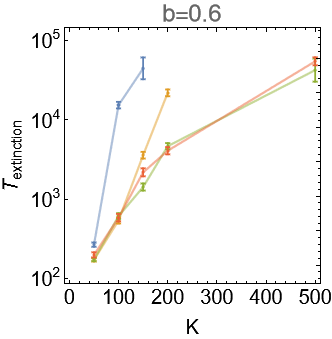

In [248]:
wws = {1, 0.04, 0.02, 0.01};
bbb = 0.6;
Textinct = 
  Table[ttt = 
    Sort[({{Mean[#[[All, 6]]], Mean[#[[All, 4]]]}, 
         ErrorBar[SE[#[[All, 4]]]]}) & /@ 
      Gather[Select[
        tmpext, (#[[7]] == ww && #[[5]] == bbb) &], (#1[[6]] == #2[[
           6]]) &]]; 
   If[Length[ttt] > 0, ttt, {{{0, 10^5}, ErrorBar[0]}}], {ww, wws}];
Show[ListLogPlot[Textinct[[All, All, 1]], Joined -> True, 
  PlotStyle -> {{Opacity[0.5], Thick}}], 
 ErrorListLogPlot[Textinct, PlotRange -> All, 
  LabelStyle -> Directive[FontSize -> 14](*,PlotLegends->
  Placed[{("w="<>ToString[#])&/@wws},{Center,Right}]*)], 
 Frame -> True, FrameStyle -> Black, 
 FrameLabel -> {"K", "\!\(\*SubscriptBox[\(T\), \(extinction\)]\)"}, 
 ImageSize -> 300, BaseStyle -> FontSize -> 18, 
 PlotLabel -> ("b=" <> ToString[bbb]), 
 PlotRange -> {Log[100], Log[10^5]}, AspectRatio -> 1, 
 FrameTicks -> {{{{Log[100], 
      "\!\(\*SuperscriptBox[\(10\), \(2\)]\)"}, {Log[1000], 
      "\!\(\*SuperscriptBox[\(10\), \(3\)]\)"}, {Log[10000], 
      "\!\(\*SuperscriptBox[\(10\), \(4\)]\)"}, {Log[100000], 
      "\!\(\*SuperscriptBox[\(10\), \(5\)]\)"}}, 
    Automatic}, {Automatic, Automatic}}]
Export[directory <> "/fig6d.pdf", %, "PDF"];

### Figure 7

In [132]:
devs = {"0.02", "0.04", "0.2"};
bbs = {"0.3", "0.6"};
kks = {"100", "200", "500", "1000", "2000", "5000"};

Clear[GetBaseFreq]
GetBaseFreq[d_] := 
 Module[{fft = Abs[Fourier[d]][[2 ;; Floor[Length[d]/2]]]}, 
  Ordering[fft, -1][[1]]]
Clear[variances]
variances = {};
Do[
 Do[
  Do[
   names = 
    FileNames[
     "time_series_quasi\\kk_" <> kks[[k]] <> "\\bb_" <> bbs[[j]] <> 
      "\\dev_" <> devs[[i]] <> "\\rep_*\\populations.dat"];
   If[Length[names] > 0,
    vars = 
     Table[nabs = 
       1. Select[
         ReadList[names[[i]], {Number, Number, Number}, 
          5000], (#[[2]] != 0 && #[[3]] != 0) &];
      nmax = GetBaseFreq[nabs[[All, 2]]]; {Variance[nabs[[All, 2]]], 
       Variance[nabs[[All, 3]]], Mean[nabs[[All, 2]]], 
       Mean[nabs[[All, 3]]], 
       Mean[Sort[nabs[[All, 2]]][[1 ;; nmax]]]}, {i, Length[names]}];
    Print["kk=", kks[[k]], " bb=", bbs[[j]], " dev=", devs[[i]], 
     " ln(vars)=", Length[vars]];
    AppendTo[
     variances, {ToExpression[kks[[k]]], ToExpression[bbs[[j]]], 
      ToExpression[devs[[i]]],   Mean[vars[[All, 1]]], 
      Mean[vars[[All, 2]]], SE[vars[[All, 1]]], SE[vars[[All, 2]]], 
      Mean[vars[[All, 3]]], Mean[vars[[All, 4]]], SE[vars[[All, 3]]], 
      SE[vars[[All, 4]]],  Mean[vars[[All, 5]]]}];
    ];
   , {j, Length[bbs]}], {i, Length[devs]}], {k, Length[kks]}]


kk=100 bb=0.3 dev=0.02 ln(vars)=21
kk=100 bb=0.6 dev=0.02 ln(vars)=21
kk=100 bb=0.3 dev=0.04 ln(vars)=21
kk=100 bb=0.6 dev=0.04 ln(vars)=21
kk=100 bb=0.3 dev=0.2 ln(vars)=21
kk=100 bb=0.6 dev=0.2 ln(vars)=21
kk=200 bb=0.3 dev=0.02 ln(vars)=21
kk=200 bb=0.6 dev=0.02 ln(vars)=21
kk=200 bb=0.3 dev=0.04 ln(vars)=21
kk=200 bb=0.6 dev=0.04 ln(vars)=21
kk=200 bb=0.3 dev=0.2 ln(vars)=20
kk=200 bb=0.6 dev=0.2 ln(vars)=20
kk=500 bb=0.3 dev=0.02 ln(vars)=21
kk=500 bb=0.6 dev=0.02 ln(vars)=20
kk=500 bb=0.3 dev=0.04 ln(vars)=21
kk=500 bb=0.6 dev=0.04 ln(vars)=20
kk=500 bb=0.3 dev=0.2 ln(vars)=20
kk=500 bb=0.6 dev=0.2 ln(vars)=20
kk=1000 bb=0.3 dev=0.02 ln(vars)=21
kk=1000 bb=0.6 dev=0.02 ln(vars)=20
kk=1000 bb=0.3 dev=0.04 ln(vars)=20
kk=1000 bb=0.6 dev=0.04 ln(vars)=20
kk=1000 bb=0.3 dev=0.2 ln(vars)=20
kk=1000 bb=0.6 dev=0.2 ln(vars)=20
kk=2000 bb=0.3 dev=0.02 ln(vars)=20
kk=2000 bb=0.6 dev=0.02 ln(vars)=20
kk=2000 bb=0.3 dev=0.04 ln(vars)=20
kk=2000 bb=0.6 dev=0.04 ln(vars)=20
kk=2000 bb=0.3 dev

Legended[-Graphics-, Placed[PointLegend[{Directive[PointSize[0.0128333], 
 
>       RGBColor[0.368417, 0.506779, 0.709798], AbsoluteThickness[1.6], FontSize -> 18], 
 
>      Directive[PointSize[0.0128333], RGBColor[0.880722, 0.611041, 0.142051], 
 
>       AbsoluteThickness[1.6], FontSize -> 18], 
 
>      Directive[PointSize[0.0128333], RGBColor[0.560181, 0.691569, 0.194885], 
 
>       AbsoluteThickness[1.6], FontSize -> 18]}, {w=0.02, w=0.04, w=0.2}, 
 
>     LegendMarkers -> {{False, Automatic}, {False, Automatic}, {False, Automatic}}, 
 
>     Joined -> {True, True, True}, LabelStyle -> Directive[FontSize -> 14], 
 
>     LegendLayout -> Column], {0.75, 0.8}, Identity]]
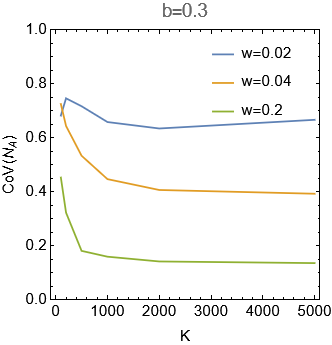

In [140]:
wws = {0.02, 0.04, 0.2};
ListPlot[Table[{#[[1]], Sqrt[#[[4]]]/#[[8]]} & /@ 
   Select[variances, (#[[2]] == 0.3 && #[[3]] == ww) &], {ww, wws}], 
 LabelStyle -> Directive[FontSize -> 14], 
 PlotLegends -> Placed[{("w=" <> ToString[#]) & /@ wws}, {0.75, 0.8}],
  Frame -> True, FrameStyle -> Black, 
 FrameLabel -> {"K", "CoV(\!\(\*SubscriptBox[\(N\), \(A\)]\))"}, 
 ImageSize -> 300, BaseStyle -> FontSize -> 18, 
 PlotLabel -> ("b=0.3"), PlotRange -> {0, 1}, AspectRatio -> 1, 
 Joined -> True]
Export[directory <> "/fig7a.pdf", %, "PDF"];

-Graphics-
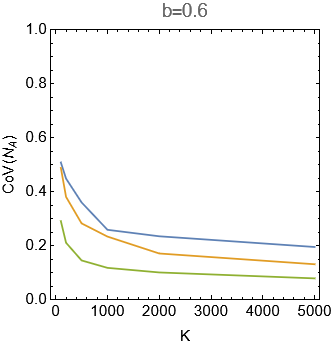

In [143]:
ListPlot[Table[{#[[1]], Sqrt[#[[4]]]/#[[8]]} & /@ 
   Select[variances, (#[[2]] == 0.6 && #[[3]] == ww) &], {ww, wws}], 
 LabelStyle -> 
  Directive[
   FontSize -> 
    14](*,PlotLegends->Placed[{("w="<>ToString[#])&/@wws},{Center,\
Right}]*), Frame -> True, FrameStyle -> Black, 
 FrameLabel -> {"K", "CoV(\!\(\*SubscriptBox[\(N\), \(A\)]\))"}, 
 ImageSize -> 300, BaseStyle -> FontSize -> 18, 
 PlotLabel -> ("b=0.6"), PlotRange -> {0, 1}, AspectRatio -> 1, 
 Joined -> True]
Export[directory <> "/fig7b.pdf", %, "PDF"];

### Figure 8

In [145]:
asynchr = ReadList["one_species_k=100000_e.dat", {Number, Number}];
Length[asynchr]

synchr = ReadList[
   "K=100000_tmax=10000_n0=1/K=100000_tmax=10000_n0=1_dev_0.02_s.dat", {Number, Number}];
Length[synchr]

320001
1108798

-Graphics-
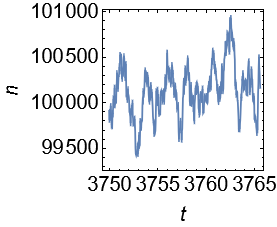

In [149]:
ListPlot[asynchr[[120000 ;; 120500]], PlotRange -> All, 
 Joined -> True, Frame -> True, FrameLabel -> {"\!\(\*
StyleBox[\"t\",\nFontSlant->\"Italic\"]\)", "\!\(\*
StyleBox[\"n\",\nFontSlant->\"Italic\"]\)"}, AspectRatio -> 1, 
 FrameStyle -> Black, ImageSize -> 250, BaseStyle -> FontSize -> 18]

In [150]:
Export[directory <> "/fig8a.pdf", %, "PDF"];

-Graphics-
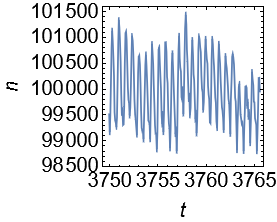

In [151]:
ListPlot[synchr[[60000 ;; 60250]], PlotRange -> All, Joined -> True, 
 Frame -> True, FrameLabel -> {"\!\(\*
StyleBox[\"t\",\nFontSlant->\"Italic\"]\)", "\!\(\*
StyleBox[\"n\",\nFontSlant->\"Italic\"]\)"}, AspectRatio -> 1, 
 FrameStyle -> Black, ImageSize -> 250, BaseStyle -> FontSize -> 18]

In [152]:
Export[directory <> "/fig8b.pdf", %, "PDF"];

In [160]:
(* Original data with nested lists and extra characters *)
names = {
  "K=100000_tmax=1000_dt10_tmax=10000_save16/K=100000_tmax=1000_dt10_tmax=10000_save16_dev_0.02_s.dat",
  "K=100000_tmax=1000_dt10_tmax=10000_save16/K=100000_tmax=1000_dt10_tmax=10000_save16_dev_0.04_s.dat",
  "K=100000_tmax=1000_dt10_tmax=10000_save16/K=100000_tmax=1000_dt10_tmax=10000_save16_dev_0.05_s.dat",
  "K=100000_tmax=1000_dt10_tmax=10000_save16/K=100000_tmax=1000_dt10_tmax=10000_save16_dev_0.08_s.dat",
  "K=100000_tmax=1000_dt10_tmax=10000_save16/K=100000_tmax=1000_dt10_tmax=10000_save16_dev_0.1_s.dat",
  "K=100000_tmax=1000_dt10_tmax=10000_save16/K=100000_tmax=1000_dt10_tmax=10000_save16_dev_0.2_s.dat",
  "K=100000_tmax=1000_dt10_tmax=10000_save16/K=100000_tmax=1000_dt10_tmax=10000_save16_dev_0_s.dat",
  "K=100000_tmax=1000_dt10_tmax=10000_save16/K=100000_tmax=1000_dt10_tmax=10000_save16_exp.dat"};

In [163]:
data = Module[{tmp = ReadList[#, {Number, Number}], ind = {1}}, 
     Do[If[tmp[[i, 1]] < tmp[[i - 1, 1]], AppendTo[ind, i]], {i, 2, 
       Length[tmp]}]; AppendTo[ind, Length[tmp] + 1]; 
     Table[tmp[[ind[[n]] ;; ind[[n + 1]] - 1]], {n, 
       Length[ind] - 1}]] & /@ names;
Table[Length[#] & /@ data[[k]], {k, 8}]

{{640001, 640001, 640001, 444766}, {640001, 640001, 640001, 427179}, 
 
>   {640001, 640001, 640001, 436354}, {640001, 640001, 640001, 434503}, 
 
>   {640001, 640001, 640001, 425864}, {640001, 640001, 640001, 435193}, 
 
>   {640001, 640001, 640001, 435617}, {640001, 640001, 640001, 416736}}

In [165]:
sss = {0.02 , 0.04 , 0.05 , 0.08 , 0.1 , 0.2 , 0, 1 (* 
   this is exp case *)};
If[Length[data] != Length[sss], Interrupt[]];
stddevs = 
 Table[Module[{d = 
     Table[StandardDeviation[
       1. data[[i, j, Floor[0.5 Length[data[[i, j]]]] ;;, 2]]], {j, 
       Length[data[[i]]]}]}, {sss[[i]], Mean[d], 
    StandardDeviation[d]}], {i, Length[data]}]

{{0.02, 721.644, 41.5601}, {0.04, 365.191, 7.44453}, {0.05, 332.004, 3.8815}, 
 
>   {0.08, 279.463, 3.81513}, {0.1, 263.658, 2.29668}, {0.2, 246.214, 2.9314}, 
 
>   {0, 15934.8, 443.456}, {1, 315.793, 3.18978}}

-Graphics-
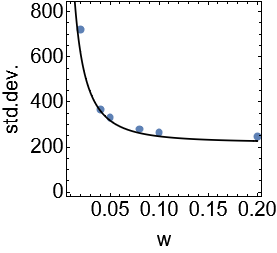

In [168]:
Show[ListPlot[{#[[1]], #[[2]]} & /@ stddevs, 
  PlotStyle -> AbsolutePointSize[7], Frame -> True, AspectRatio -> 1, 
  FrameLabel -> {"w", "std.dev."}, FrameStyle -> Black, 
  ImageSize -> 250, BaseStyle -> FontSize -> 18], 
 Plot[ Sqrt[
    10^5] (0.9241962407465939` (1/(4 Log[2]^2.) + (\[Pi]^2 (12 - 
            6 Coth[Log[2]/2] Log[2] + Log[2]^2))/(
         12 \[Gamma] Log[
           2]^4) /. {(*\[Gamma]\[Rule]decay[\[Epsilon]]*)\[Gamma] -> (28.5/3) (w)^2}))^0.5, {w, 0.01, 0.2}, PlotRange -> {0, All}, 
  PlotStyle -> Black], PlotRange -> {{0.01, 0.2}, {0, 800}}]

In [169]:
Export[directory <> "/fig8c.pdf", %, "PDF"];

-Graphics-
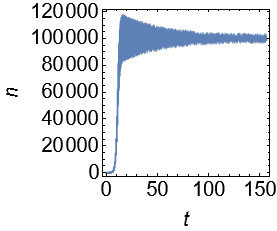

In [170]:
ListPlot[data[[3, 1, 1 ;; 10000]], PlotRange -> All, AspectRatio -> 1,
  Joined -> True, Frame -> True, FrameLabel -> {"\!\(\*
StyleBox[\"t\",\nFontSlant->\"Italic\"]\)", "\!\(\*
StyleBox[\"n\",\nFontSlant->\"Italic\"]\)"}, FrameStyle -> Black, 
 ImageSize -> 250, BaseStyle -> FontSize -> 18]

In [171]:
Export[directory <> "/fig8d.pdf", %, "PDF"];

### this code estimated the rate of exponential decay of oscillations from the time series data, for different w=0.02,...0.2


In [176]:
decays = {};

In [177]:
Module[{fun = a + b Exp[-c t], slopes, 
  d = Table[{Mean[#[[All, 1]]], 
       Max[#[[All, 2]]] - Min[#[[All, 2]]]} & /@ 
     Partition[data[[1, i, 4000 ;; 40000]], 80], {i, 
     Length[data[[1]]]}]}, 
 fit = Table[
   FindFit[d[[i]], fun, {{a, 0}, {b, 30000}, {c, 0.005}}, t], {i, 
    Length[d]}]; slopes = (c) /. fit; 
 AppendTo[decays, {0.02, Mean[slopes], SE[slopes]}]; 
]

In [178]:
Module[{fun = a + b Exp[-c t], slopes, 
  d = Table[{Mean[#[[All, 1]]], 
       Max[#[[All, 2]]] - Min[#[[All, 2]]]} & /@ 
     Partition[data[[2, i, 1000 ;; 10000]], 80], {i, 
     Length[data[[2]]]}]}, 
 fit = Table[
   FindFit[d[[i]], fun, {{a, 0}, {b, 30000}, {c, 0.005}}, t], {i, 
    Length[d]}]; slopes = (c) /. fit; 
 AppendTo[decays, {0.04, Mean[slopes], SE[slopes]}]; 
]

In [179]:
Module[{fun = a + b Exp[-c t], slopes, 
  d = Table[{Mean[#[[All, 1]]], 
       Max[#[[All, 2]]] - Min[#[[All, 2]]]} & /@ 
     Partition[data[[3, i, 1000 ;; 10000]], 80], {i, 
     Length[data[[3]]]}]}, 
 fit = Table[
   FindFit[d[[i]], fun, {{a, 0}, {b, 30000}, {c, 0.005}}, t], {i, 
    Length[d]}]; slopes = (c) /. fit; 
 AppendTo[decays, {0.05, Mean[slopes], SE[slopes]}]; 
]

In [180]:
Module[{fun = a + b Exp[-c t], slopes, 
  d = Table[{Mean[#[[All, 1]]], 
       Max[#[[All, 2]]] - Min[#[[All, 2]]]} & /@ 
     Partition[data[[4, i, 1000 ;; 3000]], 80], {i, 
     Length[data[[4]]]}]}, 
 fit = Table[
   FindFit[d[[i]], fun, {{a, 0}, {b, 30000}, {c, 0.02}}, t], {i, 
    Length[d]}]; slopes = (c) /. fit; 
 AppendTo[decays, {0.08, Mean[slopes], SE[slopes]}]; 
]

In [181]:
Module[{fun = a + b Exp[-c t], slopes, 
  d = Table[{Mean[#[[All, 1]]], 
       Max[#[[All, 2]]] - Min[#[[All, 2]]]} & /@ 
     Partition[data[[5, i, 1000 ;; 3000]], 80], {i, 
     Length[data[[5]]]}]}, 
 fit = Table[
   FindFit[d[[i]], fun, {{a, 0}, {b, 30000}, {c, 0.02}}, t], {i, 
    Length[d]}]; slopes = (c) /. fit; 
 AppendTo[decays, {0.1, Mean[slopes], SE[slopes]}]; 
]

In [182]:
Module[{fun = a + b Exp[-c t], slopes, 
  d = Table[{Mean[#[[All, 1]]], 
       Max[#[[All, 2]]] - Min[#[[All, 2]]]} & /@ 
     Partition[data[[6, i, 800 ;; 2000]], 80], {i, 
     Length[data[[6]]]}]}, 
 fit = Table[
   FindFit[d[[i]], fun, {{a, 0}, {b, 30000}, {c, 0.02}}, t], {i, 
    Length[d]}]; slopes = (c) /. fit; 
 AppendTo[decays, {0.2, Mean[slopes], SE[slopes]}]; 
]

-Graphics-
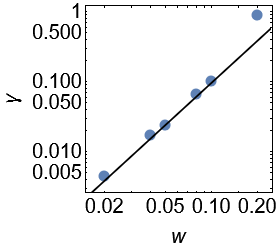

In [184]:
Show[ErrorListLogLogPlot[{{#[[1]], #[[2]]}, ErrorBar[#[[3]]]} & /@ 
   decays, PlotRange -> {{0.015, 0.25}, All}, 
  PlotStyle -> AbsolutePointSize[10]], 
 LogLogPlot[9.5 \[Epsilon]^2, {\[Epsilon], 0.01, 0.25}, 
  PlotStyle -> Black], Frame -> True, AspectRatio -> 1, 
 FrameLabel -> {"\!\(\*
StyleBox[\"w\",\nFontSlant->\"Italic\"]\)", "\[Gamma]"}, 
 FrameStyle -> Black, ImageSize -> 250, BaseStyle -> FontSize -> 18]

In [185]:
Export[directory <> "/fig8e.pdf", %, "PDF"];

### Figure 9

In [253]:
asynchr = 
  Import["S05_K_100000_1of_exp_tmax_10000_dt10_save16/S05_K_100000_1of_exp_tmax_10000_dt10_save16_b_1.000000_e.dat"];

0.015625


-Graphics-
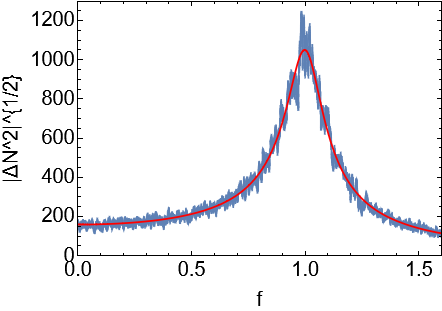

In [254]:
Module[{p =(* S05 *){39.73, 20.86, 2., 4.}(* S02 {56.45488229193919`,
  29.227441145969596`,0.8`,2.8`}*), b = 1.0, kk = 100000, dt, tt, 
  nn},
 dt = 1. (asynchr[[-1, 1]] - asynchr[[1, 1]])/Length[asynchr];
 (*tt=(asynchr[[-1,1]]-asynchr[[1,1]]);nn=Length[asynchr];*)
 
 Print[dt];
 Show[ListPlot[Sqrt[
  MovingAverage[(Abs[Fourier[asynchr[[All, 2]]]][[2 ;;]])^2 dt, 50]], 
 PlotRange -> {{0, 1.6}, {0, All}}, Joined -> True, 
 DataRange -> {0, 1/dt}, Frame -> True, 
 FrameStyle -> Black, BaseStyle -> FontSize -> 18, AspectRatio -> 0.7,FrameLabel->{"f","|\[CapitalDelta]N^2|^{1/2}"},
  ImageSize -> 400], 
  pl = Plot[
    Sqrt[(a22^2 \[Eta]1^2 - 2 a12 a22 (0) + 
        a12^2 \[Eta]2^2 + \[Eta]1^2 \[Omega]^2)/(
       a12^2 a21^2 + 2 a12 a21 \[Omega]^2 + 
        a22^2 \[Omega]^2 + \[Omega]^4)] /. {\[Eta]1^2 -> 
        2 b kk/2, \[Eta]2^2 -> 2 b kk/2 , 
       a12 -> ((b - p[[2]]) p[[3]] + p[[1]] (b + p[[3]]))/p[[4]], 
       a22 -> p[[3]]/p[[1]] (b - p[[2]]), 
       a21 -> p[[4]]/p[[1]] (b - p[[2]])} /. \[Omega] -> 
      2 \[Pi] f, {f, 0, 1.6}, PlotRange -> All, PlotStyle -> Red]]]

In [255]:
Export[directory<> "/fig9.pdf", %, "PDF"];

### Figure 10

In [256]:
synchr2 = 
  Import["S05_K_100000_1of_dev_008_tmax_10000_dt10_save16/S05_K_100000_1of_dev_008_tmax_10000_dt10_save16_b_0.900000_s.dat"][[
   4000 ;; -1]];
Length[synchr2]

508002

-Graphics-
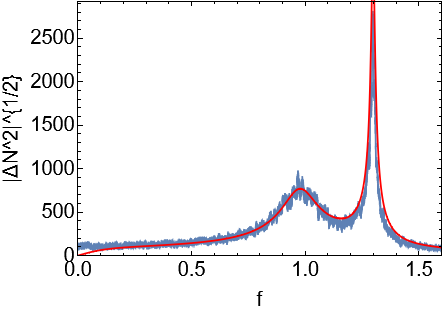

In [259]:
Module[{p =(* S05 *){39.73, 20.86, 2., 4.}(* S02 {56.45488229193919`,
  29.227441145969596`,0.8`,2.8`}*), b = 0.9, ka = 47000, kb = 50000, 
  dt, dd, tt},
 dt = (synchr2[[-1, 1]] - synchr2[[1, 1]])/Length[synchr2];
 Show[ListPlot[Sqrt[
  MovingAverage[(Abs[Fourier[synchr2[[All, 2]]]][[2 ;;]])^2 dt, 40]], 
 PlotRange -> {{0, 1.6}, {0, All}}, Joined -> True, 
 DataRange -> {0, 1/dt}, Frame -> True, FrameLabel->{"f","|\[CapitalDelta]N^2|^{1/2}"},
 FrameStyle -> Black, BaseStyle -> FontSize -> 18, AspectRatio -> 0.7,
  ImageSize -> 400], 
  pl = Plot[
    Sqrt[(a22^2 \[Eta]1^2 - 2 a12 a22 (0 \[Eta]1^2) + 
         a12^2 \[Eta]2^2 + \[Eta]1^2 \[Omega]^2)/(
        a12^2 a21^2 + 2 a12 a21 \[Omega]^2 + 
         a22^2 \[Omega]^2 + \[Omega]^4)] /. \[Eta]2^2 -> (kb/
           ka) \[Eta]1^2 /. {\[Eta]1^2 -> 
        ka (\[Omega]^2 dd2 (1/((Log[2]/tt)^2 + \[Omega]^2) + (
              2  Log[2]^2)/(( \[Gamma]^2 + (\[Omega] - 
                   2 \[Pi]/tt)^2) (4 \[Pi]^2 + Log[2]^2))) /. {dd2 -> 
             0.962, tt -> Log[2]/b, \[Gamma] -> 
             6.579 (b/0.69) (0.08)^2}), 
       a12 -> ((b - p[[2]]) p[[3]] + p[[1]] (b + p[[3]]))/p[[4]], 
       a22 -> p[[3]]/p[[1]] (b - p[[2]]), 
       a21 -> p[[4]]/p[[1]] (b - p[[2]])} /. \[Omega] -> 
      2 \[Pi] (f - 0.00), {f, 0, 1.6}, PlotRange -> All, 
    PlotStyle -> Red]]]

In [260]:
Export[directory <> "/fig10a.pdf", %, "PDF"];

In [261]:
synchr = Import[
   "S05_K_100000_1of_dev_008_tmax_10000_dt10_save16/S05_K_100000_1of_dev_008_tmax_10000_dt10_save16_b_0.700000_s.dat"];
Length[synchr]

512001

0.015625


-Graphics-
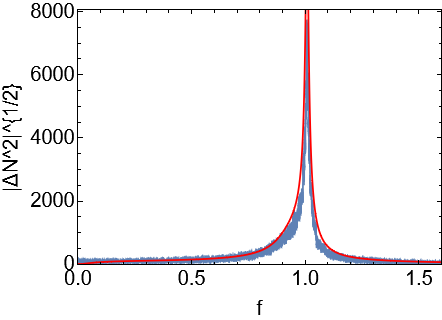

In [263]:
Module[{p =(* S05 *){39.73, 20.86, 2., 4.}(* S02 {56.45488229193919`,
  29.227441145969596`,0.8`,2.8`}*), b = 0.7, ka = 42000, kb = 51000, 
  dt, dd, tt, \[Gamma]},
 dt = 1. (synchr[[-1, 1]] - synchr[[1, 1]])/Length[synchr]; 
 Print[dt];
 Show[ListPlot[Sqrt[
  MovingAverage[(Abs[Fourier[synchr[[All, 2]]]][[2 ;;]])^2 dt, 20]], 
 PlotRange -> {{0, 1.6}, {0, All}}, Joined -> True, 
 DataRange -> {0, 1/dt}, Frame -> True, FrameLabel->{"f","|\[CapitalDelta]N^2|^{1/2}"},
 FrameStyle -> Black, BaseStyle -> FontSize -> 18, AspectRatio -> 0.7,
  ImageSize -> 400],
  pl = Plot[
    Sqrt[(a22^2 \[Eta]1^2 - 2 a12 a22 (0 \[Eta]1^2) + 
         a12^2 \[Eta]2^2 + \[Eta]1^2 \[Omega]^2)/(
        a12^2 a21^2 + 2 a12 a21 \[Omega]^2 + 
         a22^2 \[Omega]^2 + \[Omega]^4)] /. \[Eta]2^2 -> (kb/
           ka) \[Eta]1^2 /. {\[Eta]1^2 -> 
        ka (\[Omega]^2 dd2 (1/((Log[2]/tt)^2 + \[Omega]^2) + (
              2 tt^2 Log[
                2]^2)/((tt^2 \[Gamma]^2 + (-2 \[Pi] + 
                   tt \[Omega])^2) (4 \[Pi]^2 + Log[2]^2))) /. {dd2 ->
              0.962, tt -> 1, \[Gamma] -> 6.579 (0.08)^2}), 
       a12 -> ((b - p[[2]]) p[[3]] + p[[1]] (b + p[[3]]))/p[[4]], 
       a22 -> p[[3]]/p[[1]] (b - p[[2]]), 
       a21 -> p[[4]]/p[[1]] (b - p[[2]])} /. \[Omega] -> 
      2 \[Pi] (f - 0.008), {f, 0, 1.6}, PlotRange -> All, 
    PlotStyle -> Red]]]

In [264]:
Export[directory<> "/fig10b.pdf", %, "PDF"];

### Figure 11

### variances for different w:

In [197]:
Clear[VarianceNA]
VarianceNA[name_] := 
 Module[{namess = FileNames[name <> "/*_s.dat"], ds, tmp, parts, 
   means},
  tmp = Table[
    ds = 1. ReadList[namess[[i]], {Number, Number, Number}][[All, 
       2]];(* only NA taken *)
    
    parts = Partition[ds, UpTo[Floor[Length[ds]/11]]]; 
    means = Variance[#] & /@ parts; {ToExpression[
      StringCases[namess[[i]], "b_" ~~ b__ ~~ "_" -> b][[1]]], 
     Variance[ds], SE[means]}
    , {i, Length[namess]}];
  {{#[[1]], #[[2]]}, ErrorBar[#[[3]]]} & /@ tmp
  ]

In [199]:
vars = {VarianceNA["S05_K_100000_1of_dev_004_tmax_10000"], 
   VarianceNA["S05_K_100000_1of_dev_008_tmax_10000"], 
   VarianceNA["S05_K_100000_1of_dev_01_tmax_10000"], 
   VarianceNA["S05_K_100000_1of_dev_02_tmax_10000"]};
vvv = vars[[All, 7]]
vvv[[All, 1, 1]] = {(*0.02,*)0.04, 0.08, 0.1, 0.2};

6                     6                     6
{{{0.7, 5.55038 10 }, ErrorBar[1.0495 10 ]}, {{0.7, 1.94925 10 }, ErrorBar[121683.]}, 
 
                     6
>   {{0.7, 1.33489 10 }, ErrorBar[63263.5]}, {{0.7, 598964.}, ErrorBar[29792.]}}

6                    6                    6                   6
{{0.04, 9.98911 10 }, {0.06, 4.53463 10 }, {0.08, 2.62397 10 }, {0.1, 1.73813 10 }, 
 
                     6
>   {0.12, 1.25567 10 }, {0.14, 963784.}, {0.16, 773672.}, {0.18, 642961.}, 
 
>   {0.2, 549353.}}
-Graphics-
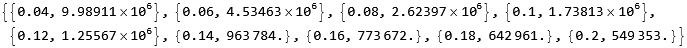
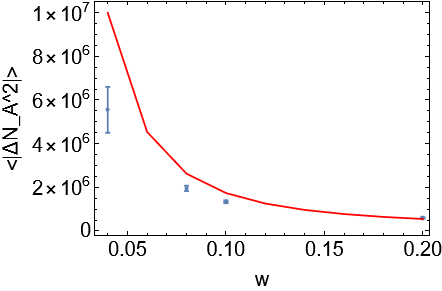

In [271]:
vvtheor = 
 Table[{ww, 
   Module[{p =(* S05 *){39.73, 20.86, 2., 4.}(* 
     S02 {56.45488229193919`,29.227441145969596`,0.8`,2.8`}*), 
     b = 0.69, kk = 10^5, dt, meanna, meannb, tt, dd, 
     expr, \[Gamma]},
    meanna = -((-b kk p[[1]] - b kk p[[3]] - kk p[[1]] p[[3]] + 
       kk p[[2]] p[[3]])/(p[[1]] p[[4]]));
    meannb = -((b kk - kk p[[2]])/p[[1]]);
    expr = (1/(2 \[Pi])) (
        a22^2 \[Eta]1^2 - 2 a12 a22 (0 ) + 
         a12^2 \[Eta]2^2 + \[Eta]1^2 \[Omega]^2)/(
        a12^2 a21^2 + 2 a12 a21 \[Omega]^2 + 
         a22^2 \[Omega]^2 + \[Omega]^4) /. \[Eta]2^2 -> \[Eta]1^2(meannb/meanna) /. {\[Eta]1^2 -> (meanna) (\[Omega]^2 dd2 (1/((Log[2]/
                  tt)^2 + \[Omega]^2) + (
              2 tt^2 Log[
                2]^2)/((tt^2 \[Gamma]^2 + (-2 \[Pi] + 
                   tt \[Omega])^2) (4 \[Pi]^2 + Log[2]^2))) /. {dd2 ->
              0.962, 
            tt -> Log[2]/b, \[Gamma] -> 6.579 (b/0.69) (ww)^2}), 
       a12 -> ((b - p[[2]]) p[[3]] + p[[1]] (b + p[[3]]))/p[[4]], 
       a22 -> p[[3]]/p[[1]] (b - p[[2]]), 
       a21 -> p[[4]]/p[[1]] (b - p[[2]])};
    Re[NIntegrate[
      expr, {\[Omega], -150, 150}, MaxRecursion -> 20, 
      MinRecursion -> 10]]]}, {ww, 0.04, 0.2, 0.02}]
Show[ErrorListPlot[vvv], 
 ListPlot[vvtheor, Joined -> True, PlotStyle -> Red], 
 PlotRange -> All, Frame -> True, FrameStyle -> Black, BaseStyle -> FontSize -> 18, 
 FrameLabel -> {"w", 
  "<|\[CapitalDelta]N_A^2|>"},
 AspectRatio -> 0.7, ImageSize -> 400]



In [273]:
Export[directory<> "/fig11.pdf", %, "PDF"];

### Figure S1

-Graphics-
1.00116
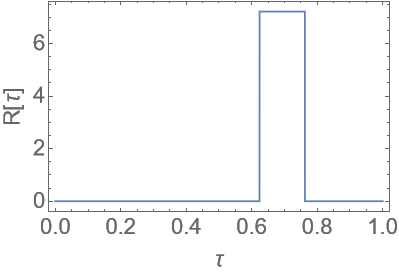

In [205]:
Clear[nstar]
rr[\[Tau]_] := 
 If[Abs[\[Tau] - Log[2]] < 0.1 Log[2], 1/(2 0.1 Log[2]), 0]
Plot[rr[\[Tau]], {\[Tau], 0, 1}, Frame -> True, 
 FrameLabel -> {"\[Tau]", "R[\[Tau]]"}, BaseStyle -> FontSize -> 20]
nstar[\[Tau]_, j_] := 
 1.0012 Exp[
   j \[Tau]] (1 - 
    2 NIntegrate[Exp[-j \[Tau]p] rr[\[Tau]p], {\[Tau]p, 0, \[Tau]}])
jj = j /. 
  FindRoot[Integrate[Exp[-j \[Tau]] rr[\[Tau]], {\[Tau], 0, 1}] == 
    1/2, {j, 1.}]

-Graphics-
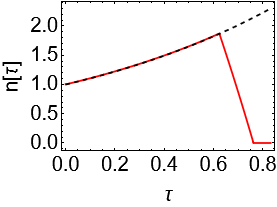

In [210]:
Plot[{nstar[\[Tau], jj], Exp[\[Tau]]}, {\[Tau], 0, 1.2 Log[2]}, 
 PlotStyle -> {Red, {Black, Dashed}}, Frame -> True, 
 FrameLabel -> {"\[Tau]", "n[\[Tau]]"}, FrameStyle -> Black, 
 BaseStyle -> FontSize -> 18, AspectRatio -> 0.7, ImageSize -> 250]

In [211]:
Export[directory <> "/figS1.pdf", %, "PDF"];

### Figure S2

### determine the frequency spectrum for time series for different w' s
### use moving average to smooth out the spectra

In [212]:
flen = 5*1.45;
specs = Table[
   Sum[Module[{d = 
        data[[i, j, 
         Floor[Min[Length[#] & /@ data[[i]]]/4] ;; 
          Min[Length[#] & /@ data[[i]]], 2]], n, 
       dt = Mean[Differences[data[[i, j, 1 ;; 100, 1]]]], tmax}, 
      n = Length[d]; tmax = dt n; d -= Mean[d];(* 
      this is the same formula as for the 2-
      species model *)(Abs[Fourier[d]][[
          2 ;; Floor[flen n dt]]])^2 (dt)], {j, Length[data[[i]]]}]/
    Length[data[[i]]], {i, Length[data]}];

-Graphics-
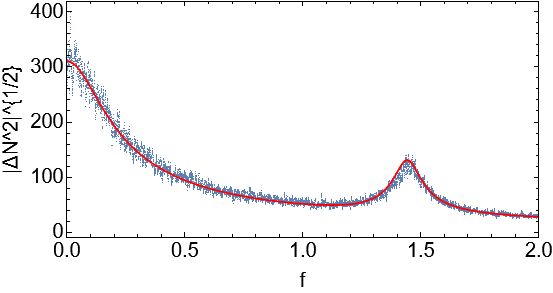

In [230]:
Show[ListPlot[MovingAverage[specs[[6, 2 ;;]]^0.5, 10], 
  DataRange -> {0, flen}, PlotRange -> {{0, 2}, All}], 
 Plot[Sqrt[
      10^5] Sqrt[(dd2/(\[Omega]^2 + 1)) + 
       1/((\[Omega] - 2 \[Pi]/Log[2])^2 + \[Gamma]^2) (
        2 Log[2]^2 dd2)/((2 \[Pi])^2 + Log[2]^2)] /. {dd2 -> 
      0.962, \[Gamma] -> (28.5/3) (0.2)^2} /. \[Omega] -> 
    2 \[Pi] f, {f, 0, 2}, PlotRange -> {0, All}, PlotStyle -> Red], 
 Frame -> True, AspectRatio -> 0.5 , FrameStyle -> Black, 
 ImageSize -> 500, BaseStyle -> FontSize -> 18,FrameLabel->{"f","|\[CapitalDelta]N^2|^{1/2}"}]

In [231]:
Export[directory <> "/figS2a.pdf", %, "PDF"];

-Graphics-
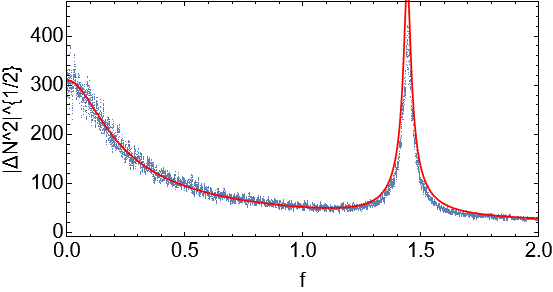

In [236]:
Show[ListPlot[MovingAverage[specs[[5, 2 ;;]]^0.5, 10], 
  DataRange -> {0, flen}, PlotRange -> {{0, 2}, All}], 
 Plot[Sqrt[
      10^5] Sqrt[(dd2/(\[Omega]^2 + 1)) + 
       1/((\[Omega] - 2 \[Pi]/Log[2])^2 + \[Gamma]^2) (
        2 Log[2]^2 dd2)/((2 \[Pi])^2 + Log[2]^2)] /. {dd2 -> 
      0.962, \[Gamma] -> (28.5/3) (0.1)^2} /. \[Omega] -> 
    2 \[Pi] f, {f, 0, 2}, PlotRange -> {0, All}, PlotStyle -> Red], 
 Frame -> True, AspectRatio -> 0.5, FrameStyle -> Black, 
 ImageSize -> 500, BaseStyle -> FontSize -> 18,FrameLabel->{"f","|\[CapitalDelta]N^2|^{1/2}"}]

In [237]:
Export[directory <> "/figS2b.pdf", %, "PDF"];

-Graphics-
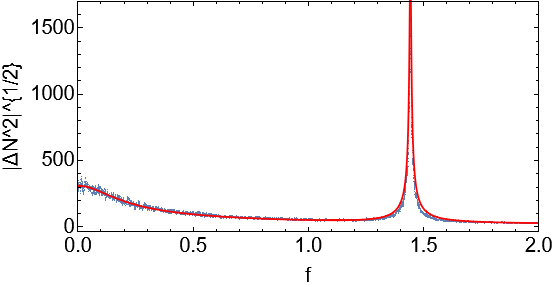

In [234]:
Show[ListPlot[MovingAverage[specs[[3, 2 ;;]]^0.5, 10], 
  DataRange -> {0, flen}, PlotRange -> {{0, 2}, All}], 
 Plot[Sqrt[
      10^5] Sqrt[(dd2/(\[Omega]^2 + 1)) + 
       1/((\[Omega] - 2 \[Pi]/Log[2])^2 + \[Gamma]^2) (
        2 Log[2]^2 dd2)/((2 \[Pi])^2 + Log[2]^2)] /. {dd2 -> 
      0.962, \[Gamma] -> (28.5/3) (0.05)^2} /. \[Omega] -> 
    2 \[Pi] f, {f, 0, 2}, PlotRange -> {0, All}, PlotStyle -> Red], 
 Frame -> True, AspectRatio -> 0.5, FrameStyle -> Black, 
 ImageSize -> 500, BaseStyle -> FontSize -> 18,FrameLabel->{"f","|\[CapitalDelta]N^2|^{1/2}"}]

In [235]:
Export[directory <> "/figS2c.pdf", %, "PDF"];